In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from collections import Counter

In [2]:
xls = pd.ExcelFile('../../../data/raw/partner_i/Dados Históricos - partner_i.xlsx', engine='openpyxl')

In [3]:
xls.sheet_names

['Descrição dados cimento',
 'Descrição dados clinquer',
 'Clinquer 2',
 'Clinquer 1',
 'CPIIE40',
 'CPIIF40']

In [4]:
df_desc_cement = pd.read_excel(xls, 'Descrição dados cimento')

In [5]:
df_desc_cement

,Ensaio,Unidade,Descrição
0,R3D,Mpa,Resistência a compressão a 3 dias
1,R7D,Mpa,Resistência a compressão a 7 dias
2,R28D,Mpa,Resistência a compressão a 28 dias
3,IP,min,Início de pega
4,FP,min,Final de pega
5,FALSAP,mm,Falsa pega dada em mm. Valores normais acima d...
6,AE1D,kg cim / Mpa,Consumo de cimento para incremento de 1MPa a 1...
7,AE7D,kg cim / Mpa,Consumo de cimento para incremento de 1MPa a 7...
8,AE28D,kg cim / Mpa,Consumo de cimento para incremento de 1MPa a 2...
9,#200,%,% de massa retida acima de 75 µm


# Exploratory Data Analyses - EDA - Cement CPIIE40

<h2>Shape, feature information and some samples</h2>

In [6]:
df = pd.read_excel(xls, 'CPIIE40')

In [7]:
df.shape

(357, 47)

In [8]:
df.head()

,Data/Hora,R3D,R7D,R28D,IP,FP,AE1D,AE7D,AE28D,#200,...,MGO,ARCANITA,K2O,NA2O,TIO2,MN2O3,FLUORITA,MUSCOVITA,CAOL DRX,EQALC
0,2019-01-03 00:00:00,31.9,38.3,47.3,200,270,-,-,-,0,...,5.36,0.26,0.67,0.12,0.27,0.21,0.24,0.23,0.67,0.56
1,2019-01-03 01:00:00,-,-,-,-,-,-,-,-,-,...,-,0.72,-,-,-,-,0.31,-,0.54,-
2,2019-01-05 00:00:00,33.7,38.1,48.4,200,270,-,-,-,0,...,5.37,0.19,0.67,0.12,0.27,0.21,0.29,0.22,0.62,0.56
3,2019-01-05 01:00:00,-,-,-,-,-,-,-,-,-,...,-,0.58,-,-,-,-,0.35,-,0.51,-
4,2019-01-08 00:00:00,29.1,38,47.5,200,270,-,-,-,0,...,5.45,0.17,0.69,0.13,0.26,0.21,0.28,0.25,0.65,0.58


In [9]:
df = pd.read_excel(xls, 'CPIIE40', na_values='-')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 47 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data/Hora     357 non-null    datetime64[ns]
 1   R3D           313 non-null    float64       
 2   R7D           313 non-null    float64       
 3   R28D          286 non-null    float64       
 4   IP            316 non-null    float64       
 5   FP            316 non-null    float64       
 6   AE1D          79 non-null     float64       
 7   AE7D          59 non-null     float64       
 8   AE28D         81 non-null     float64       
 9   #200          310 non-null    float64       
 10  #325          310 non-null    float64       
 11  #400          310 non-null    float64       
 12  BL            308 non-null    float64       
 13  RI            310 non-null    float64       
 14  PF            301 non-null    float64       
 15  CALCÁRIO      317 non-null    float64   

In [11]:
df.head()

,Data/Hora,R3D,R7D,R28D,IP,FP,AE1D,AE7D,AE28D,#200,...,MGO,ARCANITA,K2O,NA2O,TIO2,MN2O3,FLUORITA,MUSCOVITA,CAOL DRX,EQALC
0,2019-01-03 00:00:00,31.900000,38.299999,47.299999,200.0,270.0,NaN,NaN,NaN,0.0,...,5.36,0.26,0.67,0.12,0.27,0.21,0.24,0.23,0.67,0.56
1,2019-01-03 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.72,NaN,NaN,NaN,NaN,0.31,NaN,0.54,NaN
2,2019-01-05 00:00:00,33.700001,38.099998,48.400002,200.0,270.0,NaN,NaN,NaN,0.0,...,5.37,0.19,0.67,0.12,0.27,0.21,0.29,0.22,0.62,0.56
3,2019-01-05 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.58,NaN,NaN,NaN,NaN,0.35,NaN,0.51,NaN
4,2019-01-08 00:00:00,29.100000,38.000000,47.500000,200.0,270.0,NaN,NaN,NaN,0.0,...,5.45,0.17,0.69,0.13,0.26,0.21,0.28,0.25,0.65,0.58


In [12]:
df.tail()

,Data/Hora,R3D,R7D,R28D,IP,FP,AE1D,AE7D,AE28D,#200,...,MGO,ARCANITA,K2O,NA2O,TIO2,MN2O3,FLUORITA,MUSCOVITA,CAOL DRX,EQALC
352,2021-11-04,34.700001,40.5,NaN,190.0,240.0,NaN,NaN,NaN,0.0,...,5.50,0.33,0.85,0.16,0.29,0.21,0.0,NaN,0.12,NaN
353,2021-11-06,33.700001,NaN,NaN,200.0,265.0,NaN,NaN,NaN,0.0,...,5.73,0.31,0.82,0.16,0.29,0.19,0.0,NaN,0.18,NaN
354,2021-11-09,34.799999,NaN,NaN,165.0,225.0,NaN,NaN,NaN,0.0,...,5.56,0.31,0.82,0.16,0.29,0.19,0.0,NaN,0.15,NaN
355,2021-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.69,NaN,0.82,0.16,0.29,0.19,NaN,NaN,NaN,NaN
356,2021-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.79,NaN,0.82,0.16,0.29,0.19,NaN,NaN,NaN,NaN


<h2>1. Structure Investigation</h2>

In [13]:
df.dtypes.value_counts()

float64           46
datetime64[ns]     1
dtype: int64

<h3>1.1 Structure of numerical features</h3>

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
R3D,313.0,33.827157,1.678655,28.299999,33.000000,33.700001,34.900002,39.799999
R7D,313.0,41.144409,1.782746,36.200001,40.099998,41.299999,42.299999,45.500000
R28D,286.0,51.972378,2.033226,47.299999,50.599998,51.900002,53.400002,57.700001
IP,316.0,203.860759,22.649144,140.000000,190.000000,210.000000,220.000000,275.000000
FP,316.0,276.202532,32.077042,210.000000,255.000000,270.000000,295.000000,390.000000
AE1D,79.0,29.674684,3.455337,20.799999,27.750000,29.700001,31.650001,38.799999
AE7D,59.0,12.991525,0.867475,10.800000,12.500000,13.100000,13.400000,15.700000
AE28D,81.0,10.137037,0.606516,8.800000,9.600000,10.200000,10.600000,11.400000
#200,310.0,0.001806,0.011433,0.000000,0.000000,0.000000,0.000000,0.110000
#325,310.0,0.218323,0.147094,0.000000,0.100000,0.200000,0.280000,0.750000


<h3>1.2 Structure of Non-Numeric features</h3>

In [15]:
df.describe(exclude='number').T

/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last
Data/Hora,357,357,2020-09-09,1,2019-01-03,2021-11-13


<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<AxesSubplot:title={'center':'Unique Values per feature'}>

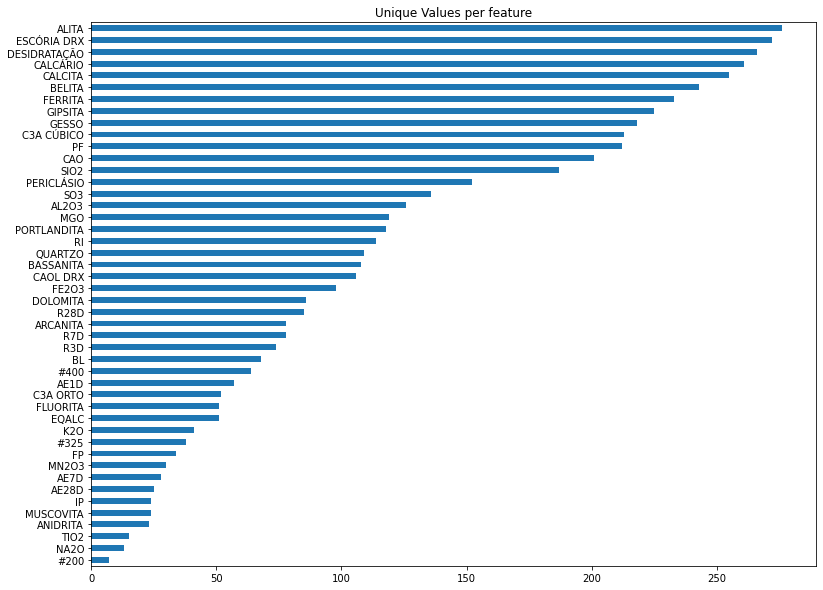

In [16]:
unique_values = df.select_dtypes(include='number').nunique().sort_values()

unique_values.plot.barh(logy=False, figsize=(13, 10), title='Unique Values per feature')

(array([0]), [Text(0, 0, 'Data/Hora')])

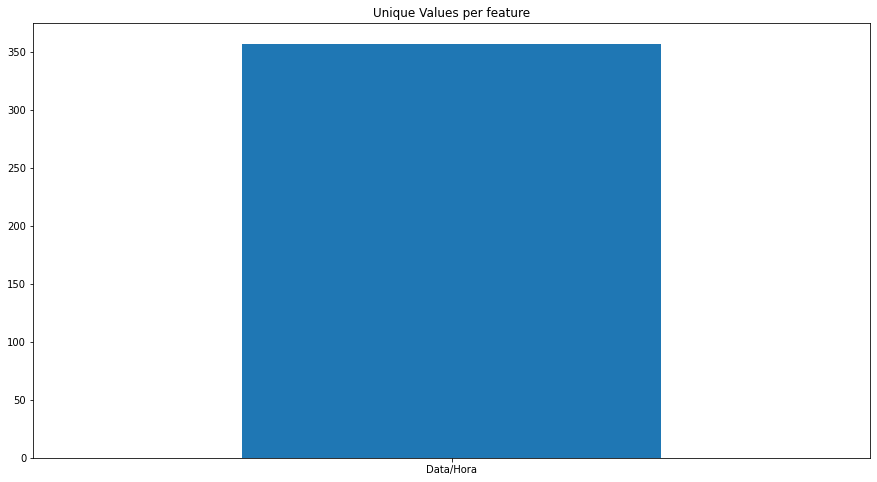

In [17]:
unique_values = df.select_dtypes(exclude='number').nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title='Unique Values per feature')

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [18]:
print("There are", df.isna().any().sum(), "variables with missing values from a total of", df.shape[1])

There are 46 variables with missing values from a total of 47


In [19]:
df.isna().any()

Data/Hora       False
R3D              True
R7D              True
R28D             True
IP               True
FP               True
AE1D             True
AE7D             True
AE28D            True
#200             True
#325             True
#400             True
BL               True
RI               True
PF               True
CALCÁRIO         True
SO3              True
GESSO            True
DESIDRATAÇÃO     True
GIPSITA          True
BASSANITA        True
PORTLANDITA      True
ESCÓRIA DRX      True
ALITA            True
BELITA           True
C3A ORTO         True
C3A CÚBICO       True
CALCITA          True
CAO              True
QUARTZO          True
SIO2             True
AL2O3            True
FERRITA          True
FE2O3            True
PERICLÁSIO       True
ANIDRITA         True
DOLOMITA         True
MGO              True
ARCANITA         True
K2O              True
NA2O             True
TIO2             True
MN2O3            True
FLUORITA         True
MUSCOVITA        True
CAOL DRX  

In [20]:
df.isna().sum()

Data/Hora         0
R3D              44
R7D              44
R28D             71
IP               41
FP               41
AE1D            278
AE7D            298
AE28D           276
#200             47
#325             47
#400             47
BL               49
RI               47
PF               56
CALCÁRIO         40
SO3              70
GESSO            40
DESIDRATAÇÃO     40
GIPSITA          40
BASSANITA        40
PORTLANDITA      40
ESCÓRIA DRX      44
ALITA            40
BELITA           40
C3A ORTO         40
C3A CÚBICO       41
CALCITA          40
CAO              70
QUARTZO          40
SIO2             70
AL2O3            70
FERRITA          40
FE2O3            70
PERICLÁSIO       40
ANIDRITA        124
DOLOMITA         40
MGO              70
ARCANITA         40
K2O              70
NA2O             70
TIO2             70
MN2O3            70
FLUORITA         40
MUSCOVITA       258
CAOL DRX         40
EQALC           169
dtype: int64

In [21]:
print("There are a total of ", df.isna().sum().sum(), "missing values.")

There are a total of  3402 missing values.


/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of quantity of missing values')

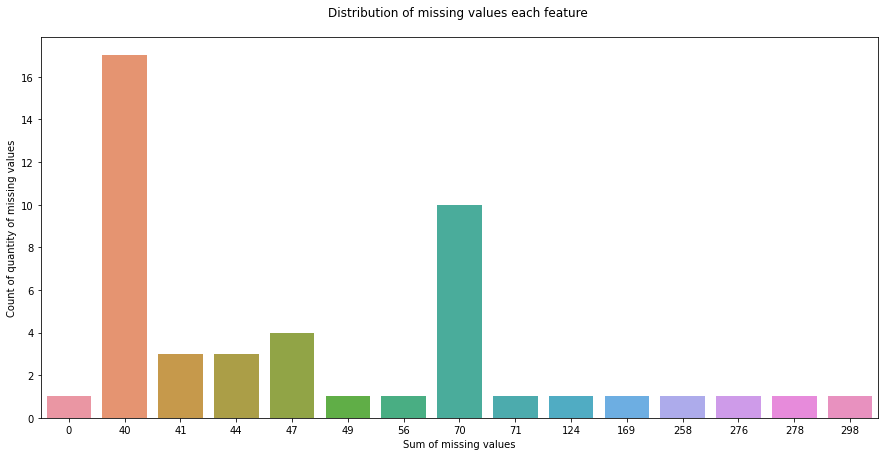

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(df.isna().sum())
plt.title('Distribution of missing values each feature \n')
plt.xlabel('Sum of missing values')
plt.ylabel('Count of quantity of missing values')

<BarContainer object of 47 artists>

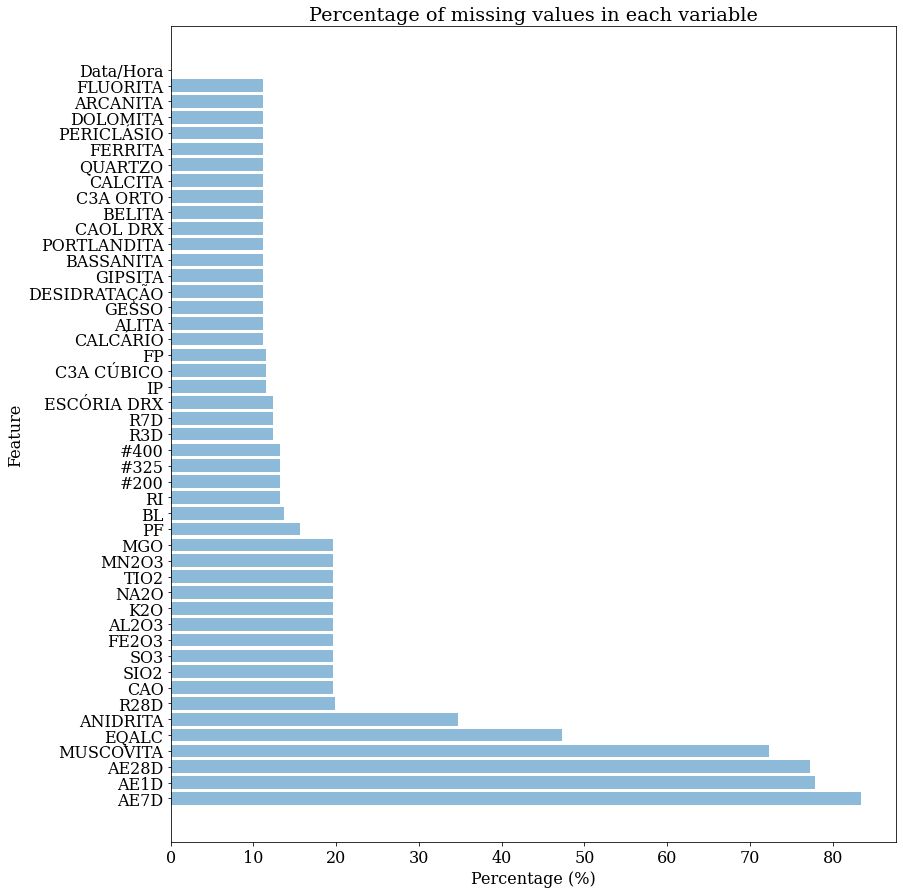

In [23]:
miss_perc = df.isnull().sum()/df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc('font', family='serif', size=16)
plt.figure(figsize=(13,15))
plt.title('Percentage of missing values in each variable')
plt.xlabel('Percentage (%)')
plt.ylabel('Feature')
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

<BarContainer object of 47 artists>

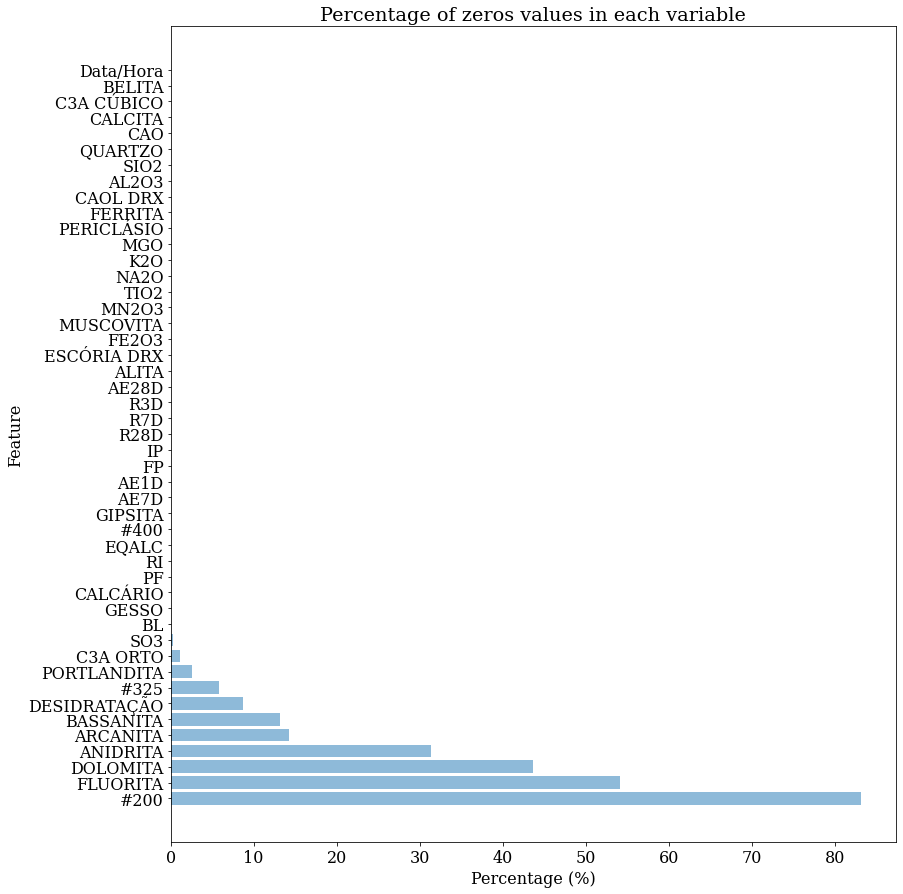

In [24]:
zeros_perc = (df == 0).sum(axis=0)/df.shape[0] * 100
zeros_perc = zeros_perc.sort_values(ascending=False)
plt.rc('font', family='serif', size=16)
plt.figure(figsize=(13,15))
plt.title('Percentage of zeros values in each variable')
plt.xlabel('Percentage (%)')
plt.ylabel('Feature')
plt.barh(zeros_perc.index, zeros_perc.round(2), alpha=0.5)

<h3>2.4. Duplicates</h3>

In [25]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


In [26]:
n_duplicates = df.drop('Data/Hora', axis=1).duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 10 duplicates samples.


<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

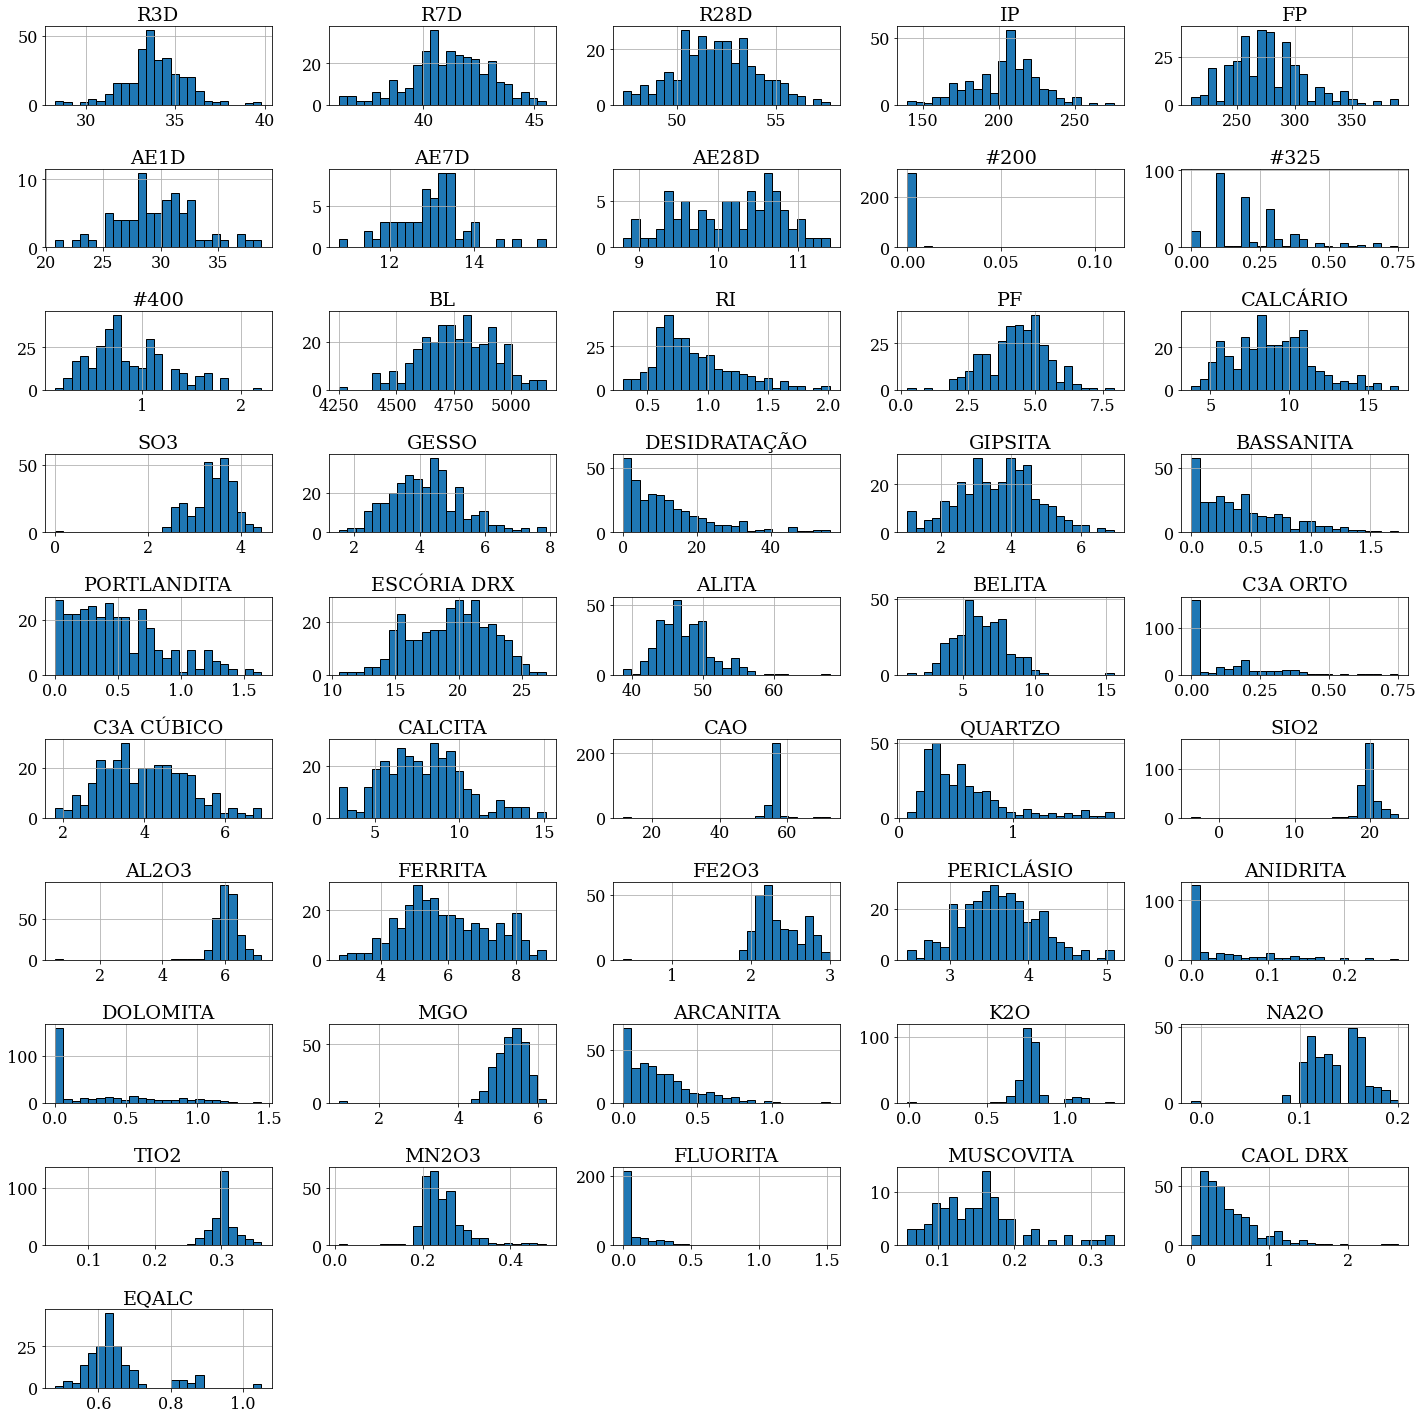

In [27]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor='black')
plt.tight_layout()

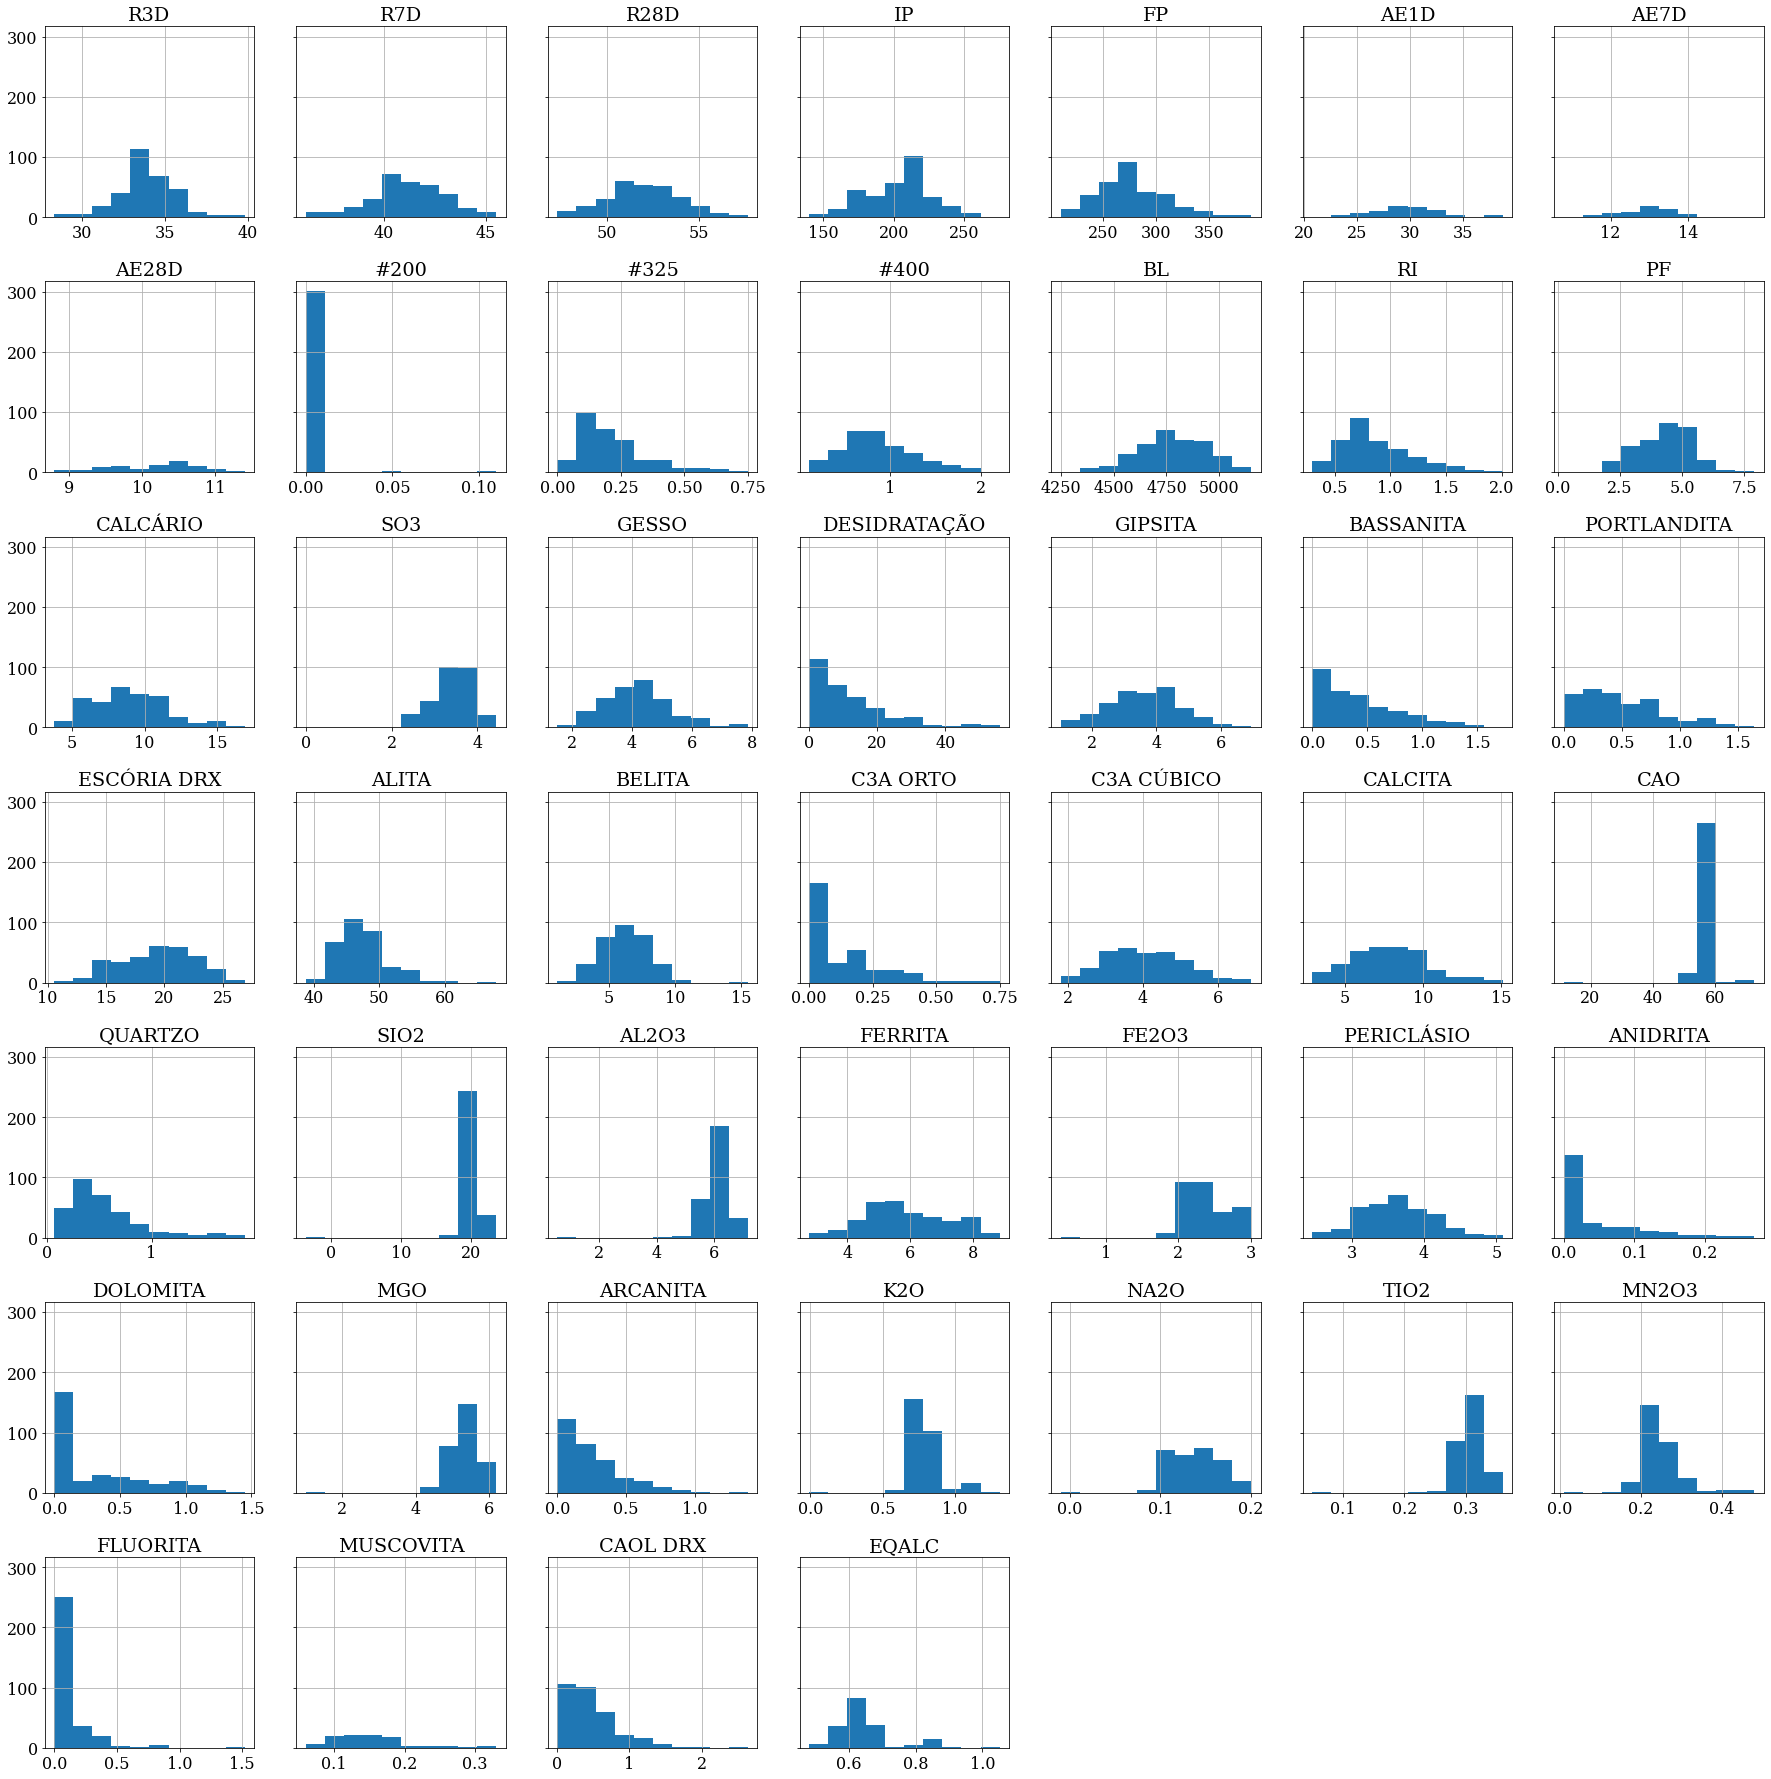

In [28]:
df.select_dtypes(include='float64').hist(figsize=(25, 25), sharey=True);
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

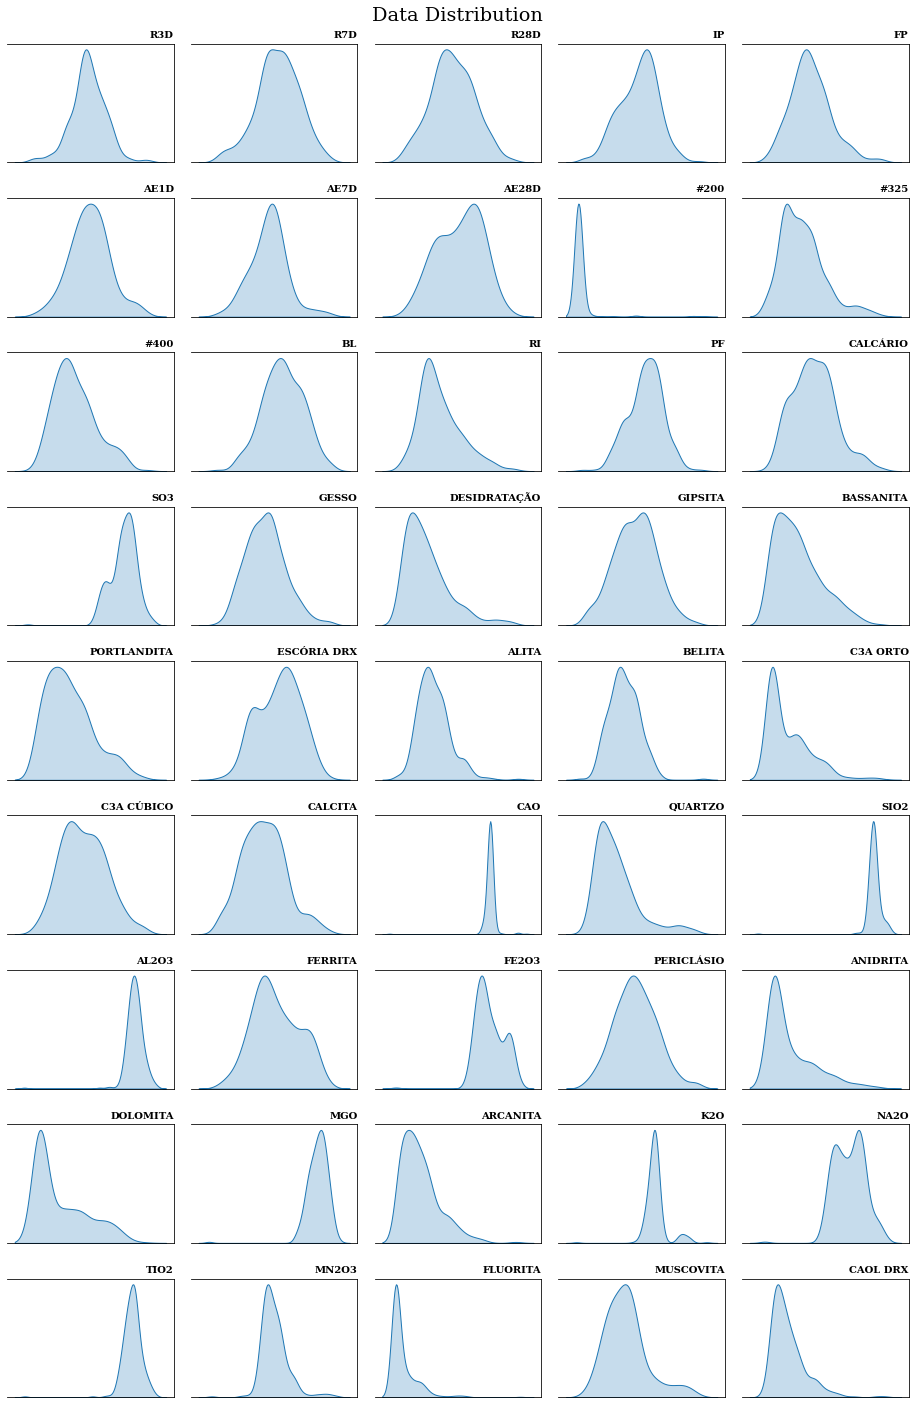

In [29]:
fig, axes = plt.subplots(9, 5,figsize=(13, 20))
axes = axes.flatten()
sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include='float64').columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette = ["#2a9d8f"], shade=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['left'].set_visible(False)
    ax.set_title(columns[i], loc='right', weight='bold', fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle('Data Distribution')

fig.tight_layout()
plt.show()

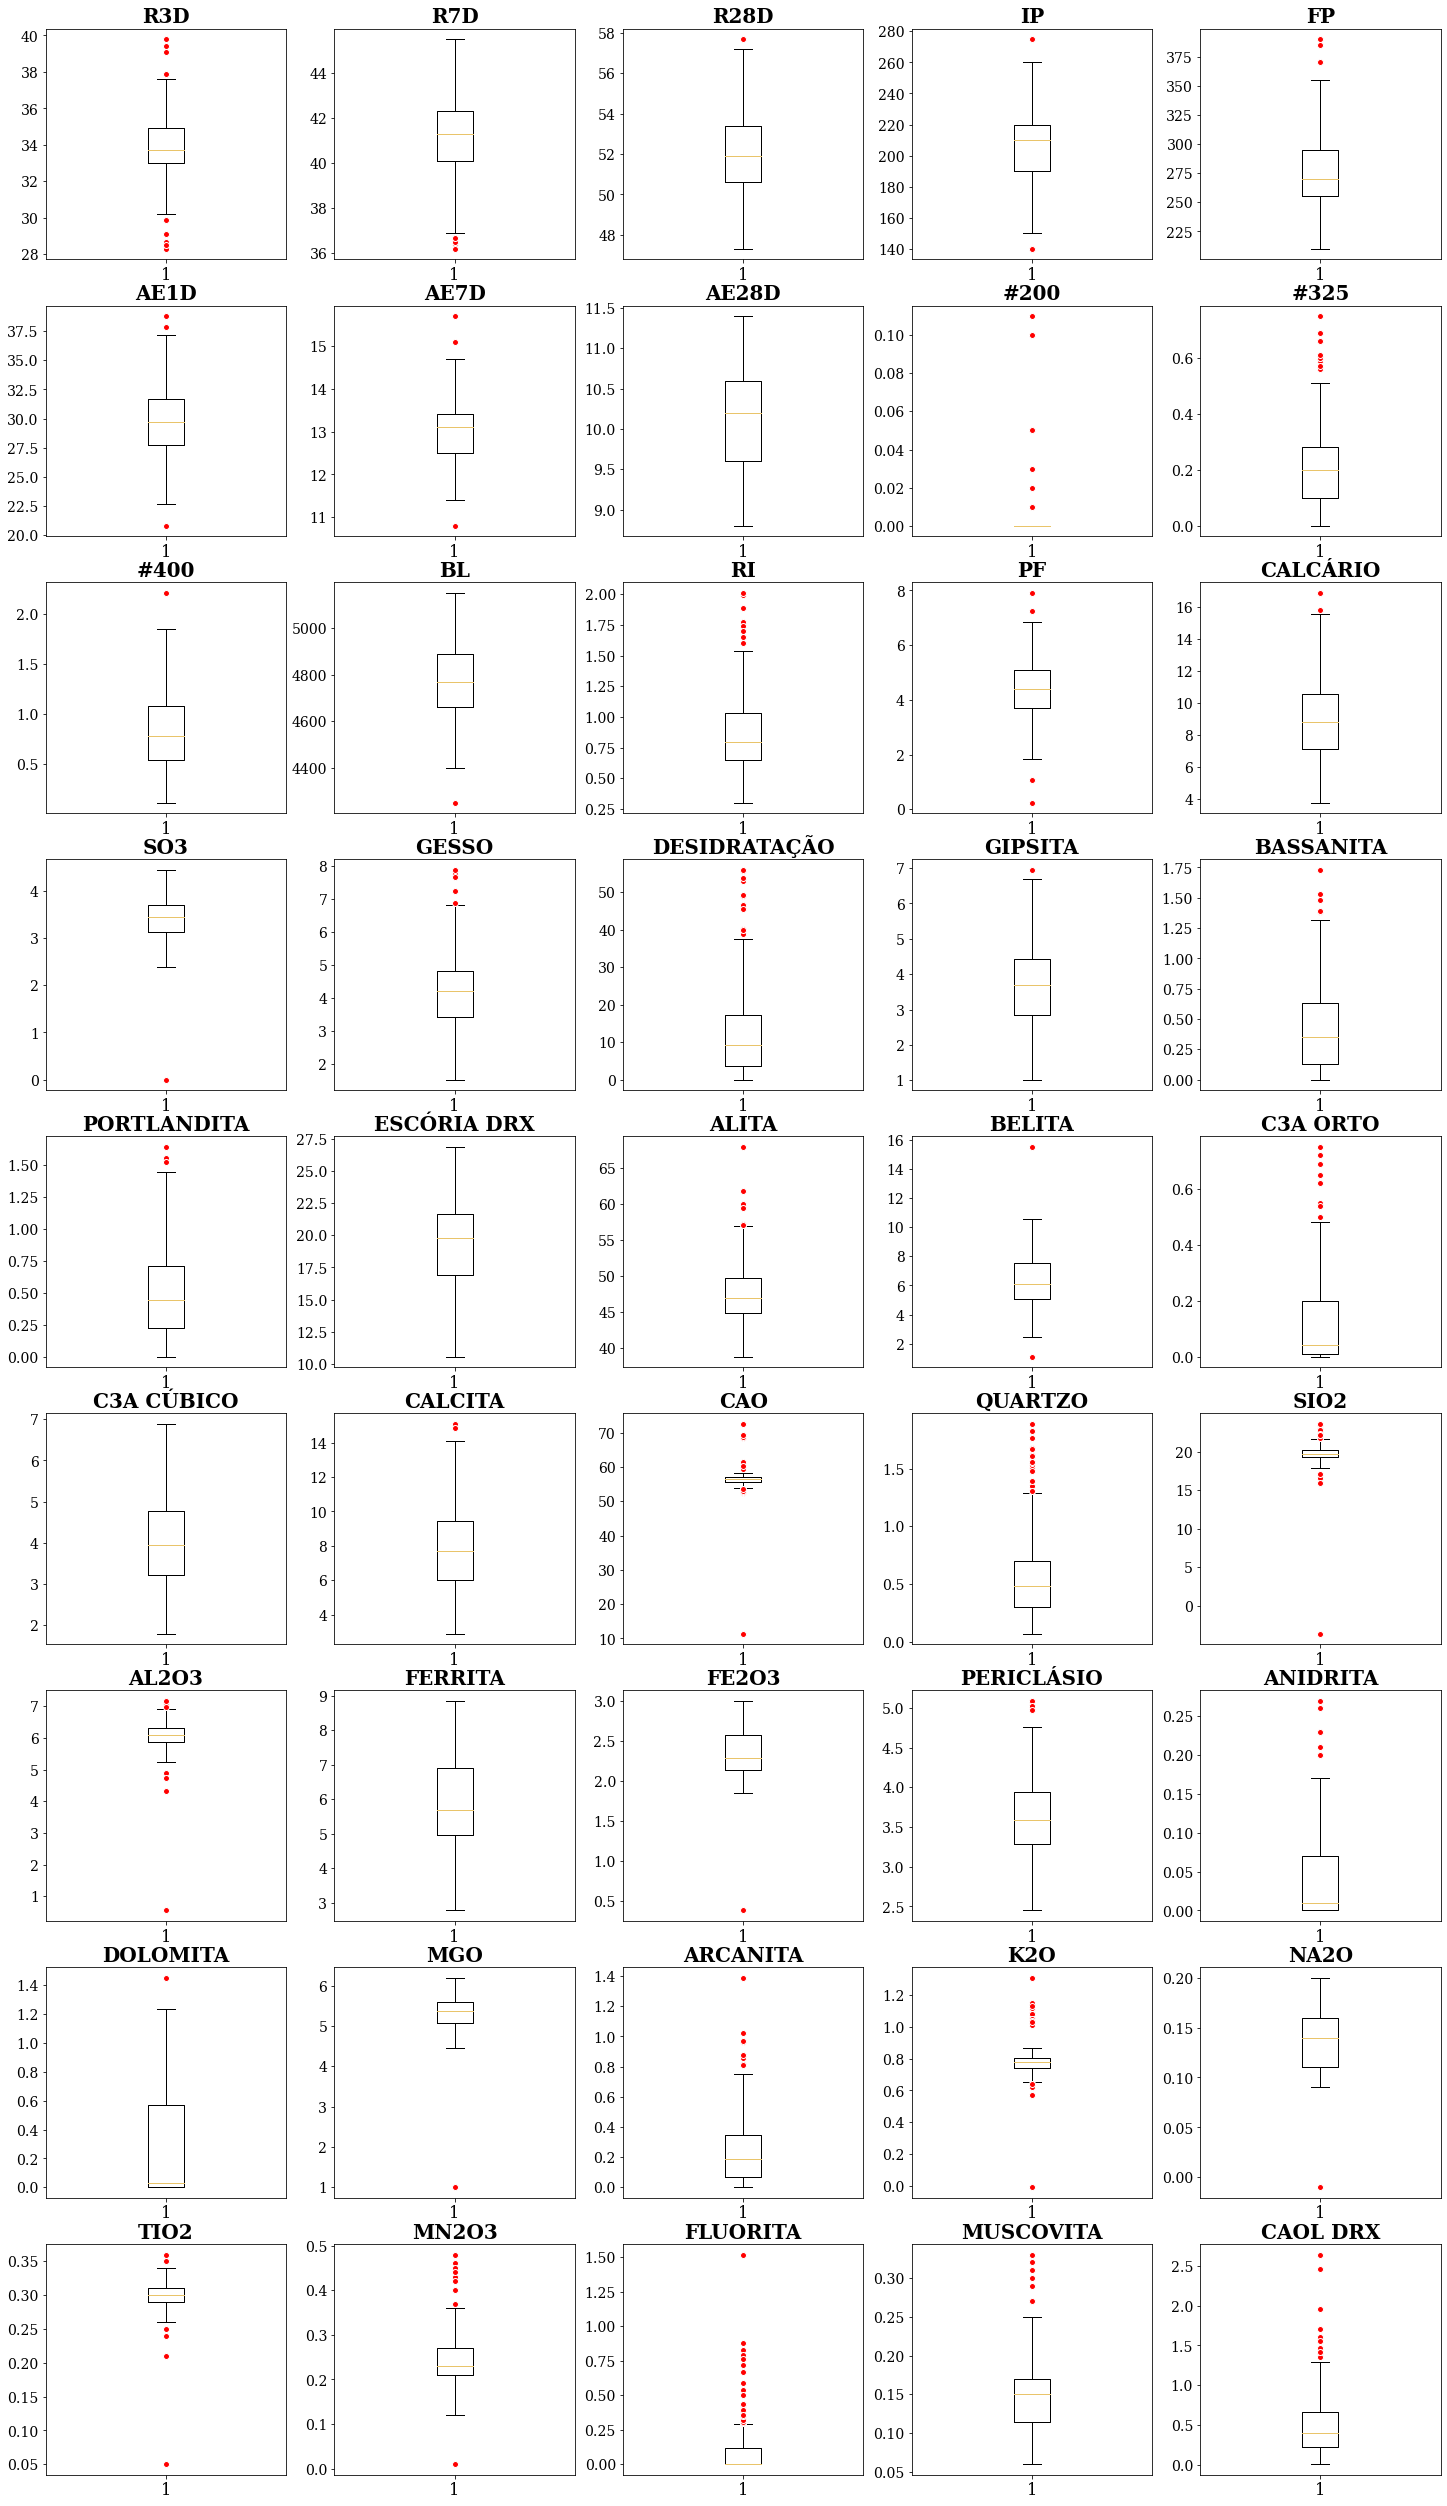

In [30]:
#Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include='float64').columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(9, 5, figsize=(25,45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:,i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)

<h3>3.3. Feature Relationship</h3>

<h3>Correlation Matrix heatmap</h3>

<AxesSubplot:>

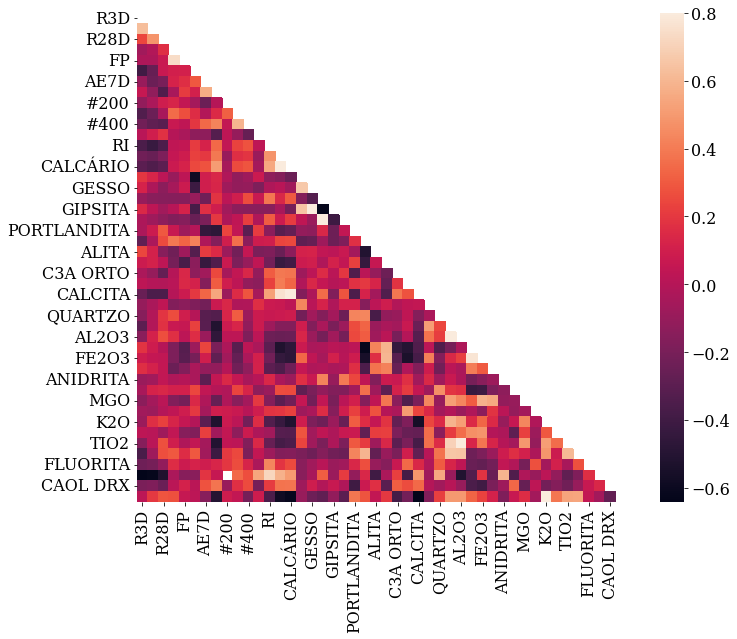

In [31]:
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, mask=mask, vmax=.8, square=True)

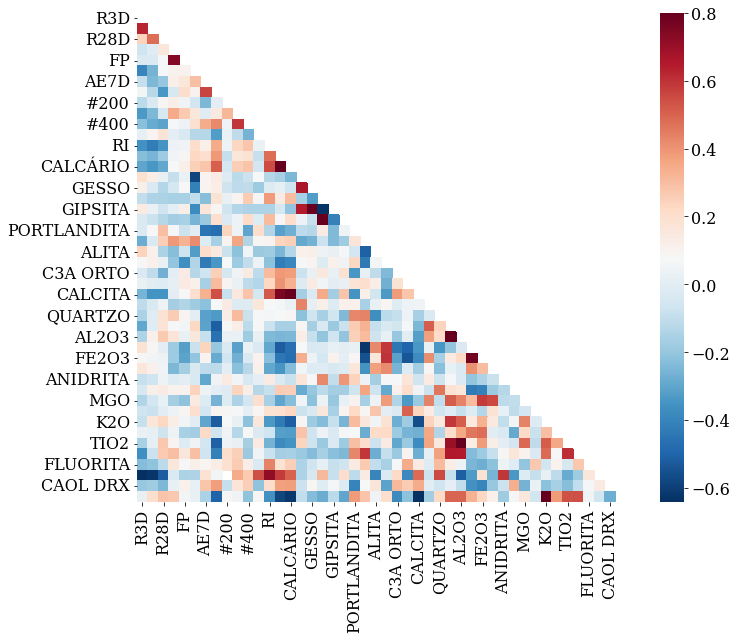

In [32]:
plt.figure(figsize=(12,9))
sns.heatmap(corr_matrix, cmap='RdBu_r', mask=mask, vmax=.8, square=True)
plt.show()

<AxesSubplot:>

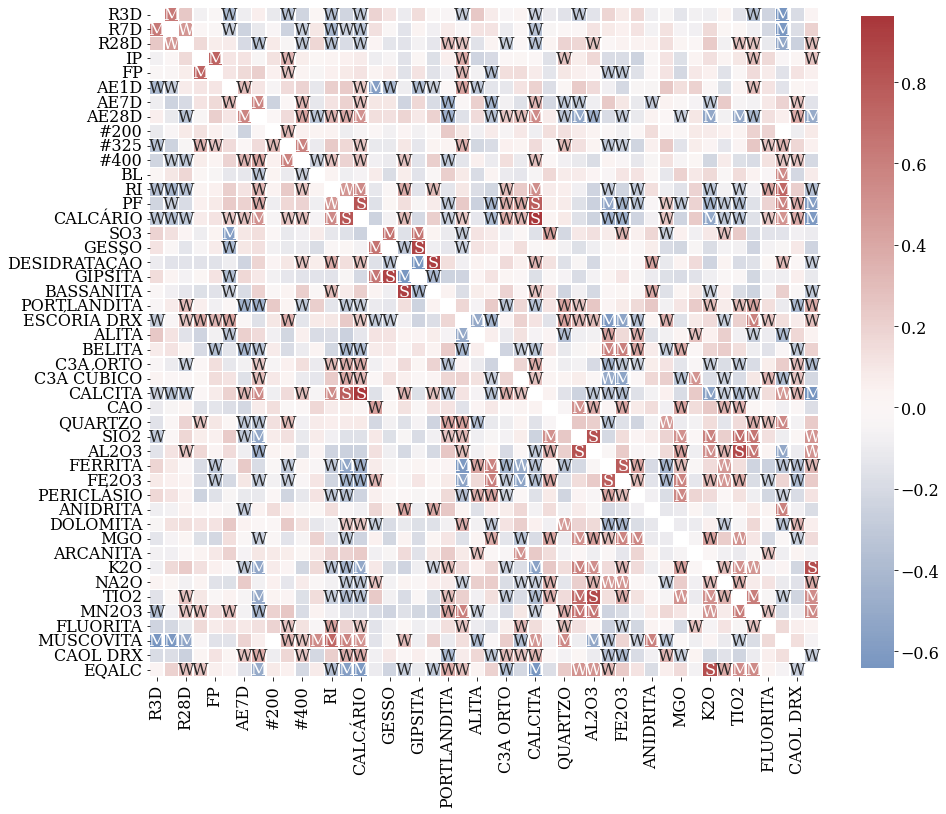

In [33]:
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(
    np.abs(df_corr) > 0.75,
    "S",
    np.where(np.abs(df_corr) > 0.5, "M", np.where(np.abs(df_corr) > 0.25, "W", "")),
)

# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

<AxesSubplot:>

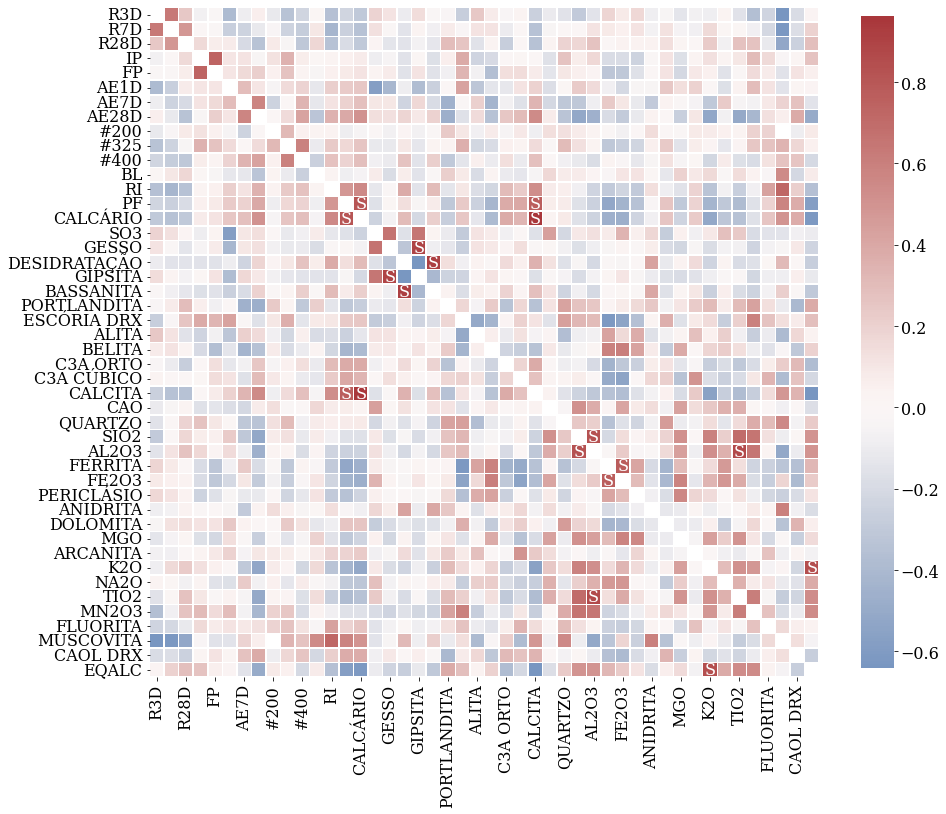

In [34]:
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr) > 0.75, "S", "")


# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

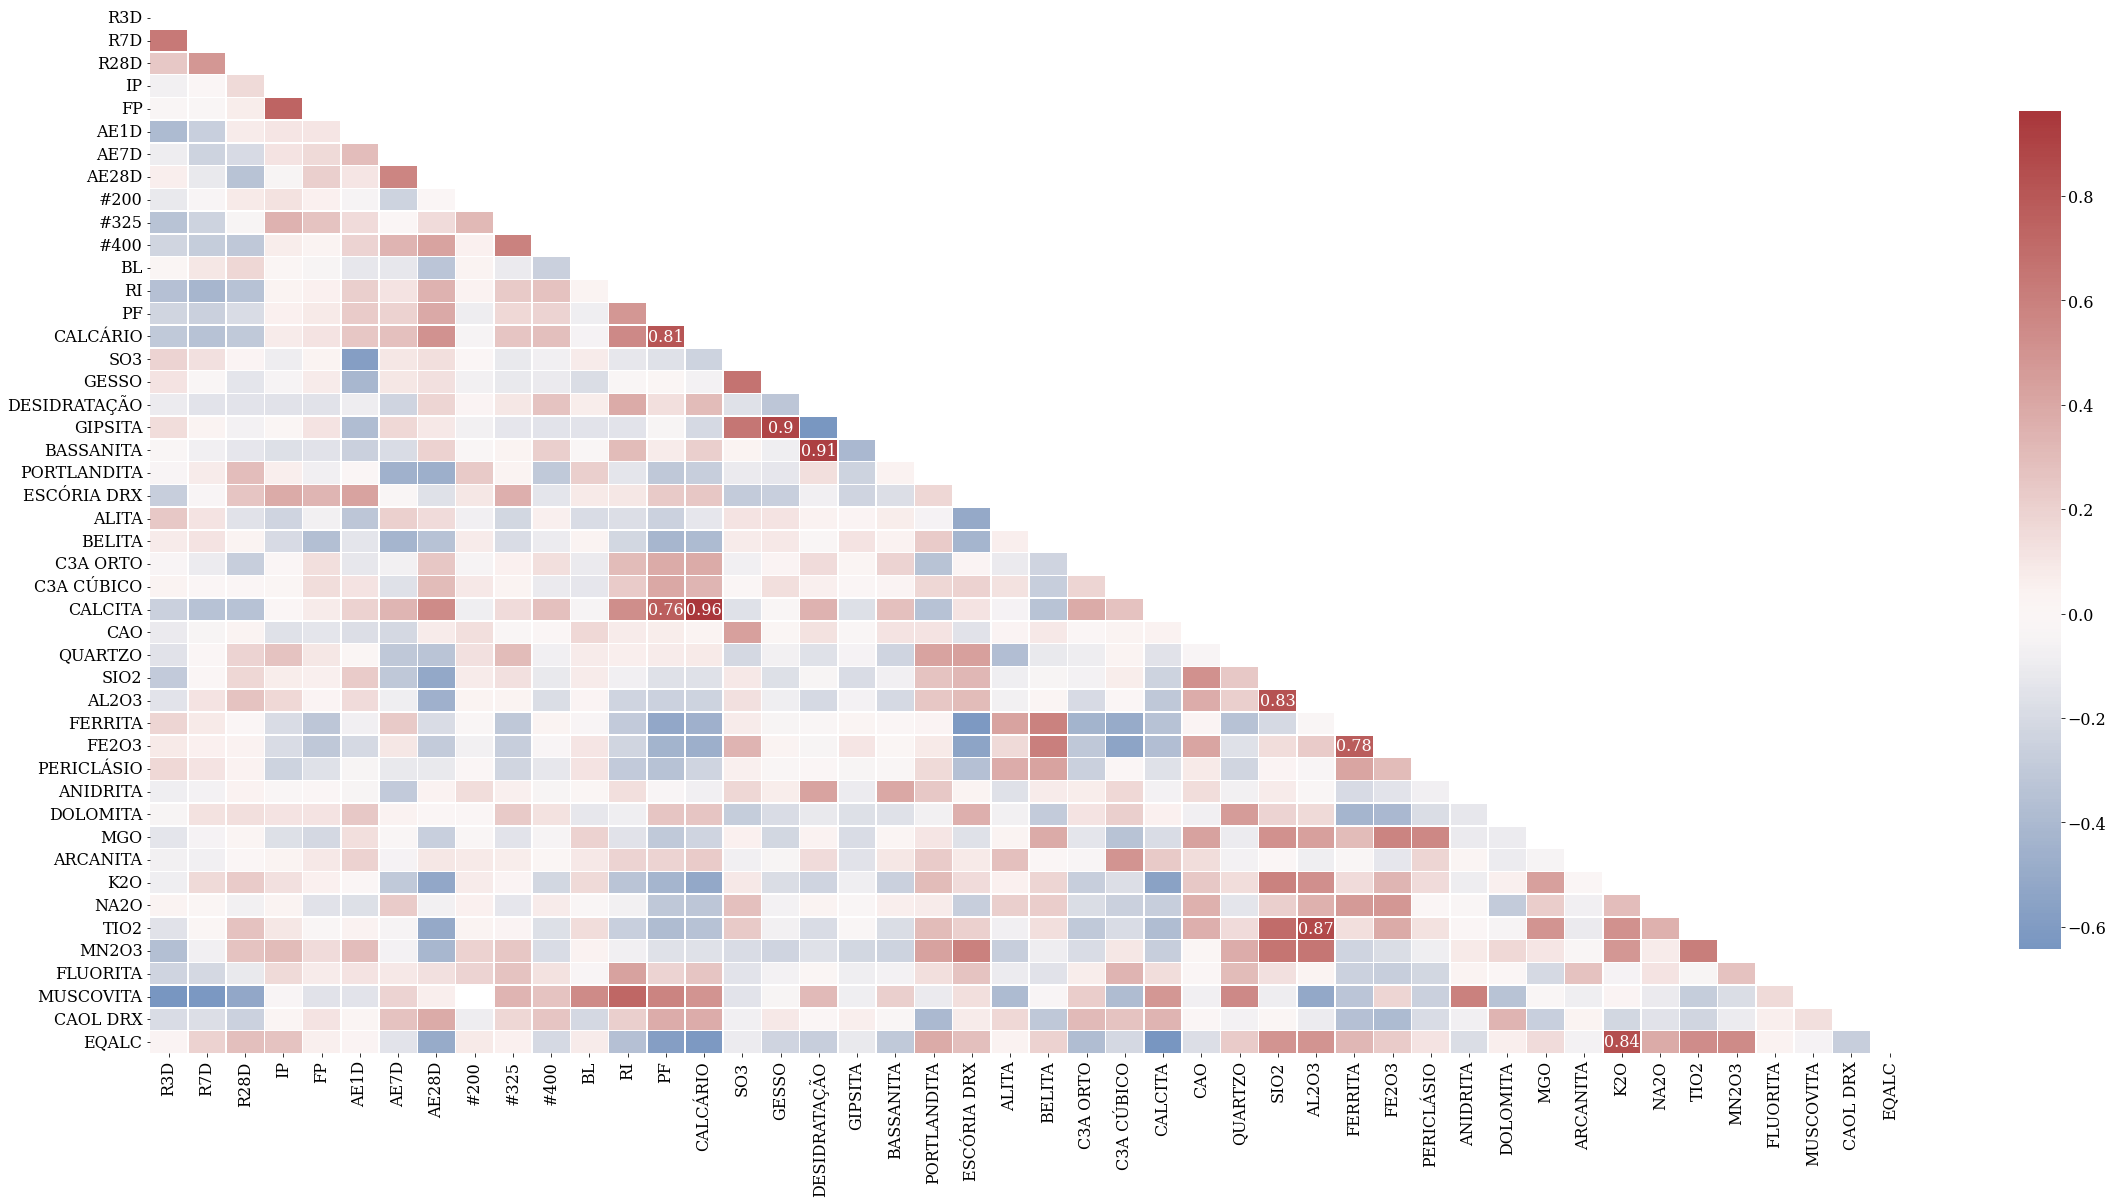

In [35]:
df_corr = df.corr(method="pearson")

labels = np.where(
    np.abs(df_corr) > 0.75, np.round(df_corr[np.abs(df_corr) > 0.75], 2), ""
)

#plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax
)

plt.tight_layout()

In [36]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    return None

In [37]:
corr_matrix = df.corr(method="pearson").abs()

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

sol[sol > 0.75]

CALCÁRIO      CALCITA      0.962144
DESIDRATAÇÃO  BASSANITA    0.914826
GESSO         GIPSITA      0.899210
AL2O3         TIO2         0.865795
K2O           EQALC        0.839966
SIO2          AL2O3        0.825163
PF            CALCÁRIO     0.813755
FERRITA       FE2O3        0.776246
PF            CALCITA      0.763469
dtype: float64

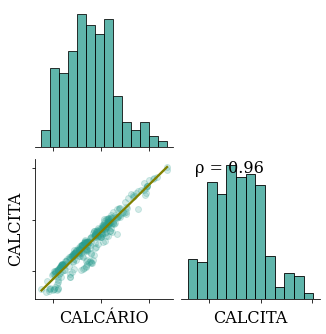

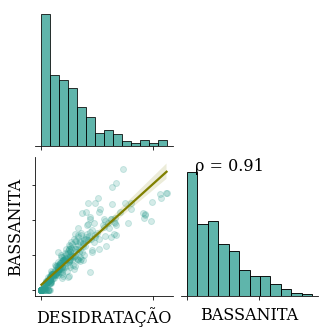

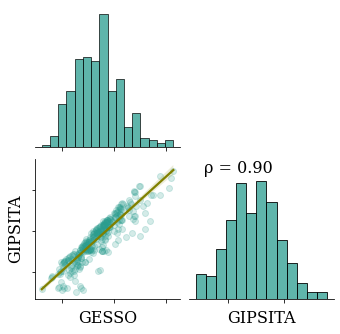

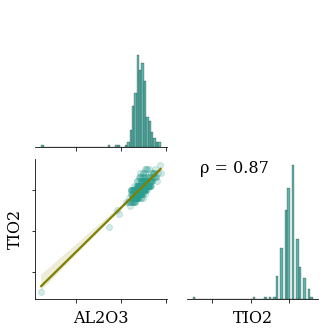

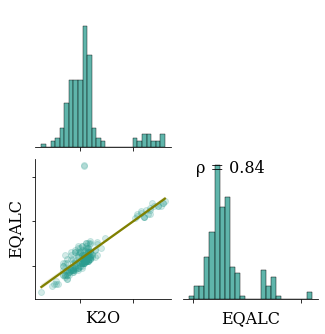

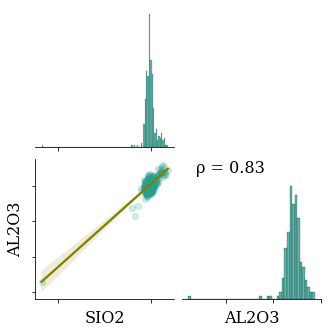

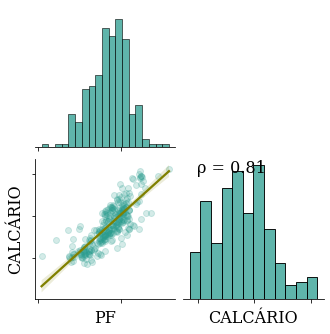

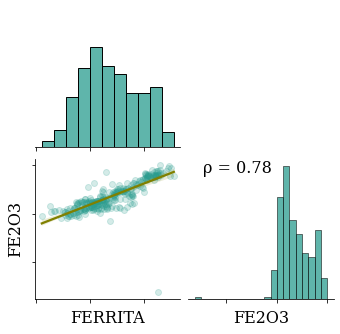

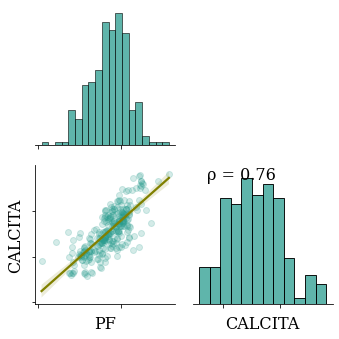

In [38]:
for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind='reg',
            plot_kws={
                'line_kws':{'color':'olive'},
                'scatter_kws': {'alpha': 0.2}
        })
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

# Data/Hora Variable Analyses

In [39]:
df['Data/Hora']

0     2019-01-03 00:00:00
1     2019-01-03 01:00:00
2     2019-01-05 00:00:00
3     2019-01-05 01:00:00
4     2019-01-08 00:00:00
              ...        
352   2021-11-04 00:00:00
353   2021-11-06 00:00:00
354   2021-11-09 00:00:00
355   2021-11-11 00:00:00
356   2021-11-13 00:00:00
Name: Data/Hora, Length: 357, dtype: datetime64[ns]

In [40]:
# How many days are valid datas e.g not weekends
dates = df['Data/Hora'].apply(lambda x: x.date()).unique()
valid_days = np.count_nonzero(np.is_busday(dates.astype('datetime64')))
print(valid_days, "valid days out of", len(dates))

252 valid days out of 350


In [41]:
dates = df['Data/Hora']

In [42]:
# All years of data
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2019, 2020, 2021}


In [43]:
months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2019: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2020: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}}

In [44]:
days_each_month_per_year = {}
for year in years:
    for month in months_each_year[year]:
        days_each_month_per_year[str(year) + '-' + str(month)] = [date.day for date in dates if date.year == year and date.month == month]

print("Days of available data for each month each year:")
days_each_month_per_year

Days of available data for each month each year:


{'2019-1': [3, 3, 5, 5, 8, 10, 12, 15, 17, 19, 22, 24, 26, 29, 31],
 '2019-2': [1, 2, 2, 5, 5, 7, 9, 12, 14, 16, 19, 21, 23, 26, 28],
 '2019-3': [1, 2, 5, 7, 9, 12, 14, 16, 19, 21, 23, 26, 28, 30],
 '2019-4': [1, 2, 3, 4, 6, 7, 9, 11, 13, 16, 18, 20, 23, 25, 27, 30],
 '2019-5': [1, 2, 5, 9, 11, 14, 16, 18, 21, 23, 24, 25, 28, 29],
 '2019-6': [1, 4, 5, 8, 11, 12, 15, 18, 21, 22, 25, 27],
 '2019-7': [1, 3, 6, 8, 10, 11, 13, 16, 17, 20, 23, 24, 25, 27, 30, 31],
 '2019-8': [1, 3, 6, 7, 10, 12, 13, 14, 17, 20, 21, 24, 31],
 '2019-9': [1, 3, 4, 10, 17, 20, 26, 28],
 '2019-10': [1, 3, 5, 8, 10, 11, 15, 16, 19, 20, 24, 26, 29, 31],
 '2019-11': [1, 4, 7, 14, 19, 23, 26, 28, 30],
 '2019-12': [1, 3, 7, 10, 11, 12, 14, 17, 18, 21, 27],
 '2020-1': [1, 3, 5, 7, 8, 9, 11, 14, 16, 17, 21, 22, 23, 24, 25, 28, 30],
 '2020-2': [1, 4, 6, 8, 10, 11, 13, 15, 18, 20, 21, 25, 27, 29],
 '2020-3': [3, 5, 6, 20, 24, 26, 27, 31],
 '2020-4': [1, 4, 7, 8, 14, 15, 18, 22, 25, 28, 29],
 '2020-5': [5, 7, 8, 9, 12, 14,

In [45]:
# count of days each month per year
count_of_days_each_month_per_year = {}

for year_month, days in days_each_month_per_year.items():
    count_of_days_each_month_per_year[year_month] = len(days)

print("Count of days each month per year:")
count_of_days_each_month_per_year

Count of days each month per year:


{'2019-1': 15,
 '2019-2': 15,
 '2019-3': 14,
 '2019-4': 16,
 '2019-5': 14,
 '2019-6': 12,
 '2019-7': 16,
 '2019-8': 13,
 '2019-9': 8,
 '2019-10': 14,
 '2019-11': 9,
 '2019-12': 11,
 '2020-1': 17,
 '2020-2': 14,
 '2020-3': 8,
 '2020-4': 11,
 '2020-5': 13,
 '2020-6': 5,
 '2020-7': 11,
 '2020-8': 11,
 '2020-9': 10,
 '2020-10': 4,
 '2020-11': 4,
 '2020-12': 1,
 '2021-1': 10,
 '2021-2': 8,
 '2021-3': 7,
 '2021-4': 5,
 '2021-5': 7,
 '2021-6': 10,
 '2021-7': 11,
 '2021-8': 8,
 '2021-9': 12,
 '2021-10': 7,
 '2021-11': 6}

In [46]:
max_obs_key = max(count_of_days_each_month_per_year, key=count_of_days_each_month_per_year.get)
max_obs_value = count_of_days_each_month_per_year[max_obs_key]
min_obs_key = min(count_of_days_each_month_per_year, key=count_of_days_each_month_per_year.get)
min_obs_value = count_of_days_each_month_per_year[min_obs_key]
print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2020-12 has the minimum number of days with samples - 1
2020-1 has the maximum number of days with samples - 17


In [47]:
mean_obs_per_year = {str(year) : 0 for year in years}

for year, value in count_of_days_each_month_per_year.items():
    mean_obs_per_year[year[:4]] += value

for year, value in months_each_year.items():
    mean_obs_per_year[str(year)] /= len(value)
    mean_obs_per_year[str(year)] = int(mean_obs_per_year[str(year)])
    
print("Mean Number of observations - per year")
print(mean_obs_per_year)
print()
print("Mean number of observations - all years")
print(int(np.mean(list(count_of_days_each_month_per_year.values()))))

Mean Number of observations - per year
{'2019': 13, '2020': 9, '2021': 8}

Mean number of observations - all years
10


In [48]:
df['Data/Hora']

0     2019-01-03 00:00:00
1     2019-01-03 01:00:00
2     2019-01-05 00:00:00
3     2019-01-05 01:00:00
4     2019-01-08 00:00:00
              ...        
352   2021-11-04 00:00:00
353   2021-11-06 00:00:00
354   2021-11-09 00:00:00
355   2021-11-11 00:00:00
356   2021-11-13 00:00:00
Name: Data/Hora, Length: 357, dtype: datetime64[ns]

In [49]:
# Here we get the frequency of the whole time series

diffs = []

for i in range(1, len(df['Data/Hora'])):
    diffs.append(df['Data/Hora'][i] - df['Data/Hora'][i-1])
diffs

[Timedelta('0 days 01:00:00'),
 Timedelta('1 days 23:00:00'),
 Timedelta('0 days 01:00:00'),
 Timedelta('2 days 23:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('0 days 01:00:00'),
 Timedelta('2 days 23:00:00'),
 Timedelta('0 days 01:00:00'),
 Timedelta('1 days 23:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('2 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedel

In [50]:
# Average Frequency
np.mean(diffs)

Timedelta('2 days 22:26:57.977528089')

In [51]:
Counter(diffs)

Counter({Timedelta('0 days 01:00:00'): 4,
         Timedelta('1 days 23:00:00'): 2,
         Timedelta('2 days 23:00:00'): 2,
         Timedelta('2 days 00:00:00'): 133,
         Timedelta('3 days 00:00:00'): 93,
         Timedelta('1 days 00:00:00'): 59,
         Timedelta('1 days 21:00:00'): 1,
         Timedelta('1 days 03:00:00'): 1,
         Timedelta('4 days 00:00:00'): 17,
         Timedelta('7 days 00:00:00'): 7,
         Timedelta('6 days 00:00:00'): 5,
         Timedelta('5 days 00:00:00'): 15,
         Timedelta('14 days 00:00:00'): 1,
         Timedelta('18 days 00:00:00'): 1,
         Timedelta('0 days 05:00:00'): 3,
         Timedelta('6 days 19:00:00'): 3,
         Timedelta('21 days 00:00:00'): 1,
         Timedelta('11 days 00:00:00'): 2,
         Timedelta('40 days 00:00:00'): 1,
         Timedelta('16 days 00:00:00'): 2,
         Timedelta('9 days 00:00:00'): 1,
         Timedelta('12 days 00:00:00'): 1,
         Timedelta('17 days 00:00:00'): 1})

<AxesSubplot:xlabel='count'>

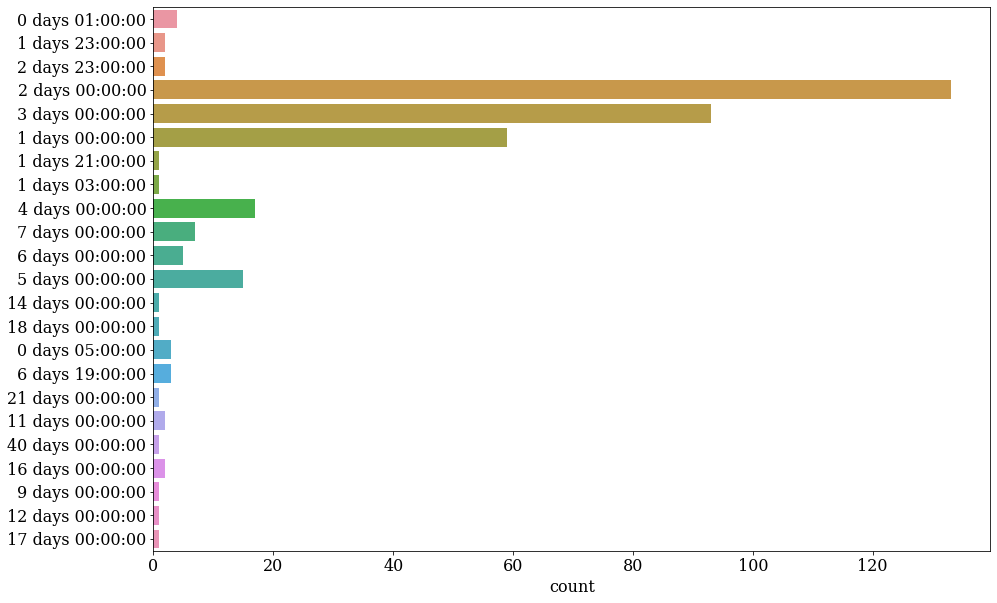

In [52]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.countplot(y=diffs)

In [53]:
# Same thing but only with the dates

diffs = []

for i in range(1, len(df['Data/Hora'])):
    diffs.append(df['Data/Hora'][i].date() - df['Data/Hora'][i-1].date())
diffs

[datetime.timedelta(0),
 datetime.timedelta(2),
 datetime.timedelta(0),
 datetime.timedelta(3),
 datetime.timedelta(2),
 datetime.timedelta(2),
 datetime.timedelta(3),
 datetime.timedelta(2),
 datetime.timedelta(2),
 datetime.timedelta(3),
 datetime.timedelta(2),
 datetime.timedelta(2),
 datetime.timedelta(3),
 datetime.timedelta(2),
 datetime.timedelta(1),
 datetime.timedelta(1),
 datetime.timedelta(0),
 datetime.timedelta(3),
 datetime.timedelta(0),
 datetime.timedelta(2),
 datetime.timedelta(2),
 datetime.timedelta(3),
 datetime.timedelta(2),
 datetime.timedelta(2),
 datetime.timedelta(3),
 datetime.timedelta(2),
 datetime.timedelta(2),
 datetime.timedelta(3),
 datetime.timedelta(2),
 datetime.timedelta(1),
 datetime.timedelta(1),
 datetime.timedelta(3),
 datetime.timedelta(2),
 datetime.timedelta(2),
 datetime.timedelta(3),
 datetime.timedelta(2),
 datetime.timedelta(2),
 datetime.timedelta(3),
 datetime.timedelta(2),
 datetime.timedelta(2),
 datetime.timedelta(3),
 datetime.timede

In [54]:
# Average Frequency
np.mean(diffs)

datetime.timedelta(2, 80817, 977528)

In [55]:
Counter(diffs)

Counter({datetime.timedelta(0): 7,
         datetime.timedelta(2): 136,
         datetime.timedelta(3): 95,
         datetime.timedelta(1): 60,
         datetime.timedelta(4): 17,
         datetime.timedelta(7): 10,
         datetime.timedelta(6): 5,
         datetime.timedelta(5): 15,
         datetime.timedelta(14): 1,
         datetime.timedelta(18): 1,
         datetime.timedelta(21): 1,
         datetime.timedelta(11): 2,
         datetime.timedelta(40): 1,
         datetime.timedelta(16): 2,
         datetime.timedelta(9): 1,
         datetime.timedelta(12): 1,
         datetime.timedelta(17): 1})

<AxesSubplot:xlabel='count'>

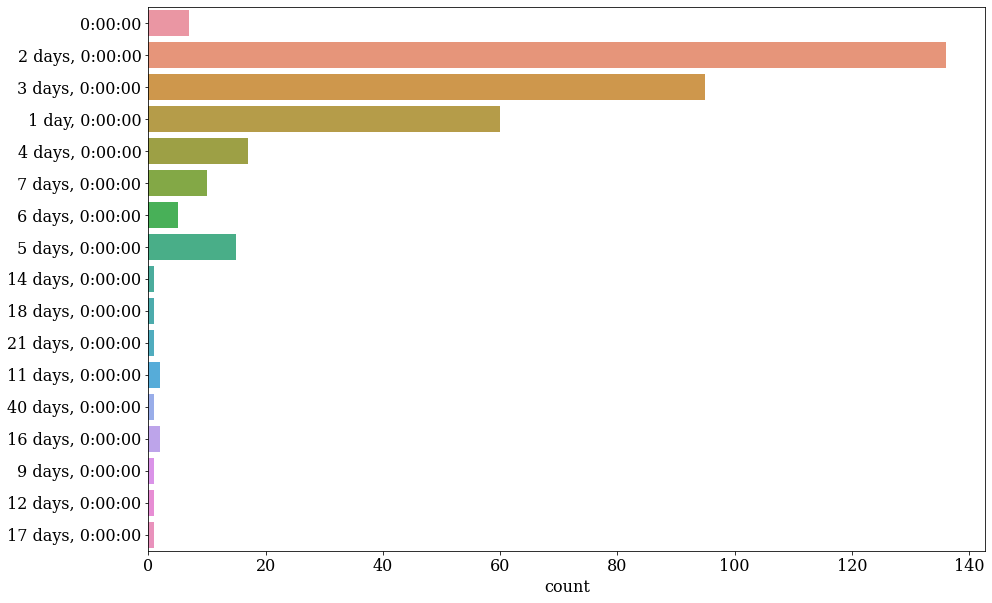

In [56]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.countplot(y= diffs)

In [57]:
# percent of diffs
[round(val/df.shape[0] *100, 2) for val in list(Counter(diffs).values())]

[1.96,
 38.1,
 26.61,
 16.81,
 4.76,
 2.8,
 1.4,
 4.2,
 0.28,
 0.28,
 0.28,
 0.56,
 0.28,
 0.56,
 0.28,
 0.28,
 0.28]

<h3>Saving the dataset as csv for further exploration and modelling<h3>

In [58]:
df.to_csv('../../../data/raw/partner_i/dados-historicos-partner_i-cement-CPIIE40.csv', index=False)